Basic data visualization in Python
---------------------------------------

This notebook illustrates some basic techniques for graphing data using Python.  Here we focus on scatterplots, histograms, and boxplots.  Other plotting techniques such as countour plots and heatmaps are also possible.

There are many Python libraries that support visualization.  Here we focus on five of them:

* [Matplotlib](http://matplotlib.org): a very mature low/mid level full-featured graphing library

* [Pandas visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html): an interface to Matplotlib through Pandas objects

* [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/index.html): a more abstract interface to Matplotlib

* [mpld3](http://mpld3.github.io): dynamic graphing based on [d3.js](https://d3js.org)

* [Bokeh](http://bokeh.pydata.org/en/latest): a full-featured dynamic graphics library

To illustrate the graphing techniques, we will use some of the NHANES (National Health and Nutrition Examination Study) data:

* https://wwwn.cdc.gov/Nchs/Nhanes/2009-2010/DEMO_F.XPT

* https://wwwn.cdc.gov/Nchs/Nhanes/2009-2010/BPX_F.XPT

* https://wwwn.cdc.gov/Nchs/Nhanes/2009-2010/BMX_F.XPT

Preliminaries
--------------

First, we load some of the basic libraries we will need.

In [1]:
import pandas as pd
import numpy as np

Next we load the three NHANES data files (see above for URLs) and merge them into a single data frame.

In [2]:
demo = pd.read_sas("DEMO_F.XPT")
bpx = pd.read_sas("BPX_F.XPT")
bmx = pd.read_sas("BMX_F.XPT")

df = pd.merge(demo, bpx, left_on='SEQN', right_on='SEQN')
df = pd.merge(df, bmx, left_on='SEQN', right_on='SEQN')
df.columns

Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIDEXMON', 'RIAGENDR', 'RIDAGEYR',
       'RIDAGEMN', 'RIDAGEEX', 'RIDRETH1', 'DMQMILIT', 'DMDBORN2', 'DMDCITZN',
       'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDSCHOL', 'DMDMARTL', 'DMDHHSIZ',
       'DMDFMSIZ', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR', 'RIDEXPRG', 'DMDHRGND',
       'DMDHRAGE', 'DMDHRBR2', 'DMDHREDU', 'DMDHRMAR', 'DMDHSEDU', 'SIALANG',
       'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG',
       'MIAPROXY', 'MIAINTRP', 'AIALANG', 'WTINT2YR', 'WTMEC2YR', 'SDMVPSU',
       'SDMVSTRA', 'PEASCST1', 'PEASCTM1', 'PEASCCT1', 'BPXCHR', 'BPQ150A',
       'BPQ150B', 'BPQ150C', 'BPQ150D', 'BPAARM', 'BPACSZ', 'BPXPLS',
       'BPXPULS', 'BPXPTY', 'BPXML1', 'BPXSY1', 'BPXDI1', 'BPAEN1', 'BPXSY2',
       'BPXDI2', 'BPAEN2', 'BPXSY3', 'BPXDI3', 'BPAEN3', 'BPXSY4', 'BPXDI4',
       'BPAEN4', 'BMDSTATS', 'BMXWT', 'BMIWT', 'BMXRECUM', 'BMIRECUM',
       'BMXHEAD', 'BMIHEAD', 'BMXHT', 'BMIHT', 'BMXBMI', 'BMXLEG', 'BMILEG',
       

The following Jupyter directive may be needed in order for the plots to appear in the notebook.  Depending on your configuration this may not be necessary.

In [3]:
%matplotlib inline

Matplotlib
------------

Matplotlib is a mature and powerful graphing library for Python.  It comes with two main interfaces.  The Matplotlib API is low-level and object oriented.  The `pyplot` interface is somewhat more abstract, and resembles to some degree Matlab "handle graphics". We will mainly use the pyplot interface here, which we load next:

In [4]:
import matplotlib.pyplot as plt

First we make a basic scatterplot of two of the systolic blood pressure measurements (paired by person). 

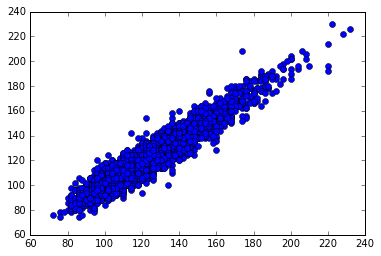

In [5]:
plt.plot(df.BPXSY1, df.BPXSY2, 'o')

Next we make a more elaborate version of the same scatterplot.

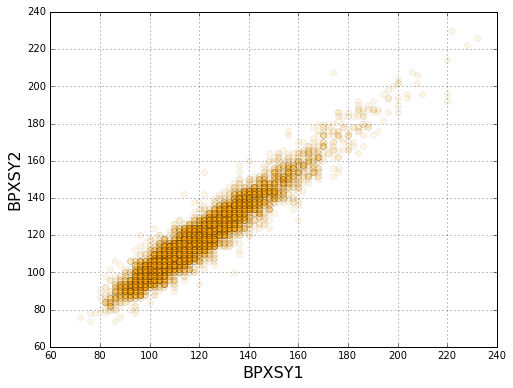

In [6]:
plt.figure(figsize=(8, 6))
plt.grid(True)
plt.plot(df.BPXSY1, df.BPXSY2, 'o', alpha=0.1, color='orange')
plt.xlabel("BPXSY1", size=16)
plt.ylabel("BPXSY2", size=16)

Here is a basic histogram of the first blood pressure value.

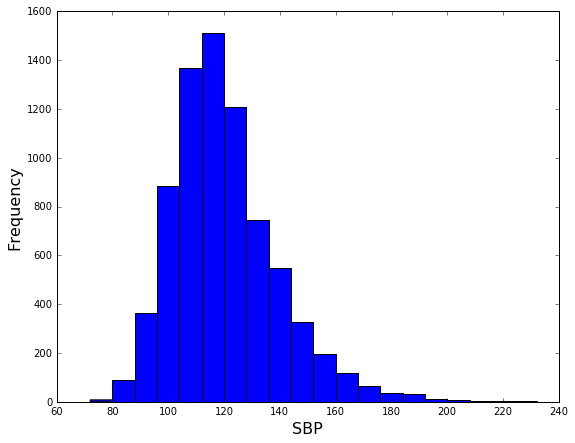

In [7]:
plt.figure(figsize=(9, 7))
plt.hist(df.BPXSY1.dropna().values, bins=20)
plt.xlabel("SBP", size=16)
plt.ylabel("Frequency", size=16)

Next we will make a more elaborate histogram plot in which the blood pressure distribution is split by gender.  To do this, first we will recode the gender variable (refer to the NHANES codebook for coding information).

In [8]:
df["RIAGENDR"] = df["RIAGENDR"].replace({1: "Male", 2: "Female"})
gr = df.groupby("RIAGENDR")["BPXSY1"]
da = {x : y.dropna() for x,y in gr}

Now we are ready to make the plot

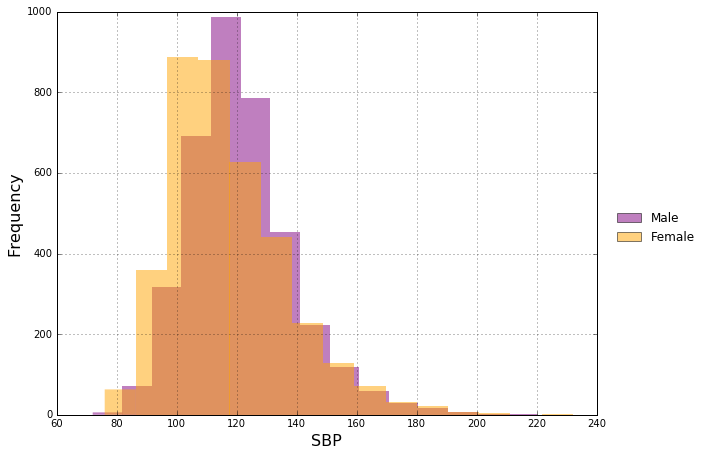

In [9]:
plt.figure(figsize=(10, 7))
ax = plt.axes([0.1, 0.1, 0.75, 0.8])
plt.grid(True)
plt.hist(da["Male"], alpha=0.5, color='purple', edgecolor="none", bins=15, label="Male")
plt.hist(da["Female"], alpha=0.5, color='orange', edgecolor="none", bins=15, label="Female")
plt.xlabel("SBP", size=16)
plt.ylabel("Frequency", size=16)

ha, lb = ax.get_legend_handles_labels()
leg = plt.figlegend(ha, lb, "center right")
leg.draw_frame(False)

Next we have a basic "side by side boxplot":

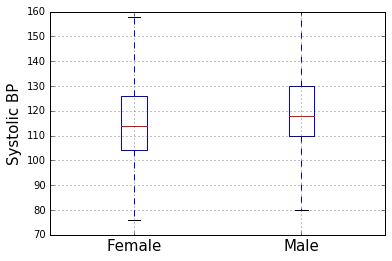

In [10]:
plt.boxplot((da["Female"], da["Male"]), sym='')
plt.grid(True)
ax = plt.gca()
ax.set_xticklabels(["Female", "Male"], size=15)
ax.set_ylabel("Systolic BP", size=15)

Next we will make a side-by-side boxplot showing the blood pressure distribution by age group.  To do this we need a list of arrays containing the blood pressure data for each age group.  We can obtain this by using pandas `cut` and `groupby`.

In [11]:
df["Agecut"] = pd.cut(df.RIDAGEYR, [20, 30, 40, 50, 60, 70, 80])
dff = df[df.RIAGENDR == "Female"]
gb = dff.groupby("Agecut")["BPXSY1"]
ky = [x for x,y in gb]
va = [y.dropna() for x,y in gb]

Now we are ready to make the plot.

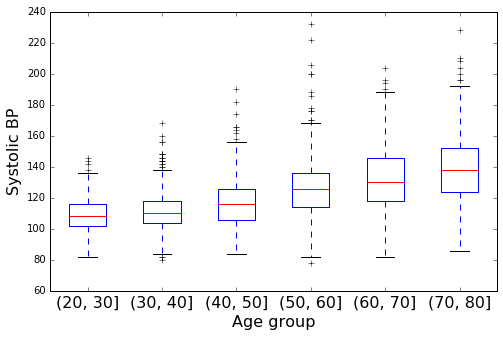

In [12]:
plt.figure(figsize=(8, 5))
plt.boxplot(va)
ax = plt.gca()
ax.set_xticklabels(ky, size=16)
ax.set_xlabel("Age group", size=16)
ax.set_ylabel("Systolic BP", size=16)

Pandas
-------

Pandas is mainly a data management library, but Pandas objects have many convenience methods for calling Matplotlib to create plots.  An overview of these methods can be found at the following link:

http://pandas.pydata.org/pandas-docs/stable/visualization.html


First we create a simple scatterplot.

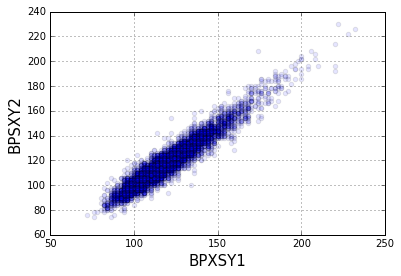

In [13]:
ax = df.plot(x='BPXSY1', y='BPXSY2', kind='scatter', alpha=0.1)
plt.grid(True)
ax.set_xlabel("BPXSY1", size=15)
ax.set_ylabel("BPSXY2", size=15)

Next we have a more elaborate scatterplot in which the point color is a function of the subject's age.

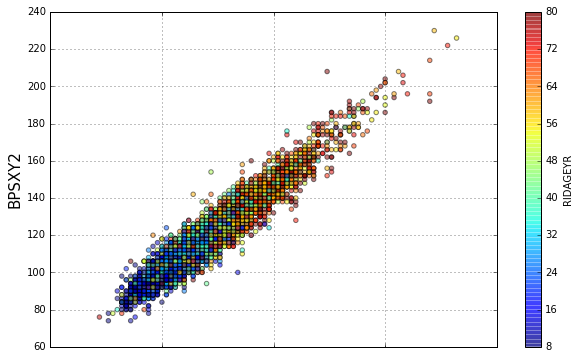

In [14]:
ax = df.plot(x='BPXSY1', y='BPXSY2', kind='scatter', c='RIDAGEYR', cmap='jet', alpha=0.5, figsize=(10 ,6))
plt.grid(True)
ax.set_xlabel("BPXSY1", size=15)
ax.set_ylabel("BPSXY2", size=15)

Next we make some histograms.  If we call the `hist` method on a dataframe, separate histograms for the columns are produced.

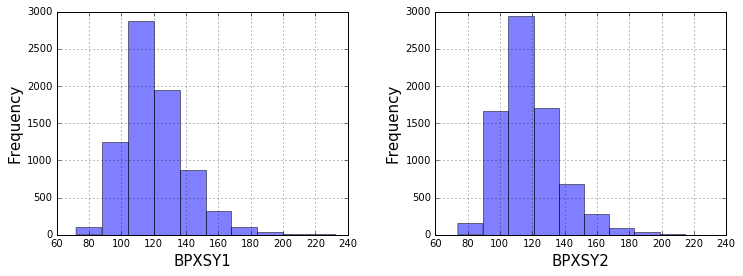

In [15]:
ax = df[["BPXSY1", "BPXSY2"]].hist(alpha=0.5, figsize=(12, 4))
ax = ax[0]
ax[0].set_title("")
ax[1].set_title("")
ax[0].set_xlabel("BPXSY1", size=15)
ax[1].set_xlabel("BPXSY2", size=15)
ax[0].set_ylabel("Frequency", size=15)
ax[1].set_ylabel("Frequency", size=15)

Now we can make a basic boxplot of systolic blood pressure by age group.

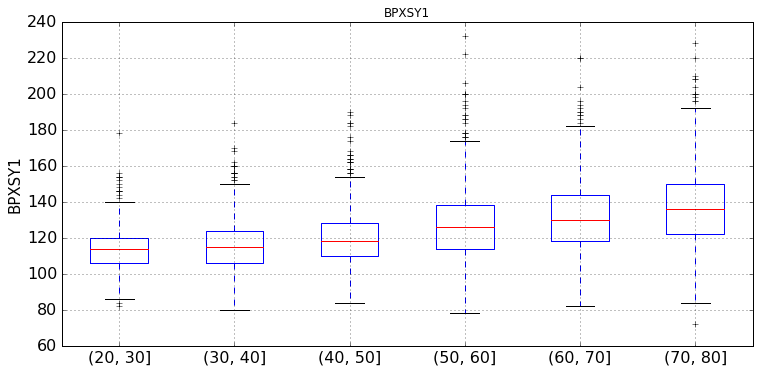

In [16]:
df.boxplot(column=("BPXSY1"), by=("Agecut"), figsize=(12, 6))
plt.suptitle("")
plt.ylabel("BPXSY1", size=15)
plt.xlabel("")
ax = plt.gca()
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

With some effort, any aspect of these plots can be customized.  By passing `return_type='dict'`, we obtain a dictionary that contains objects corresponding to each box in the boxplot.  We can then set the properties of each part as desired.  Below we customize the boxes and remove the "fliers".

(60, 200)

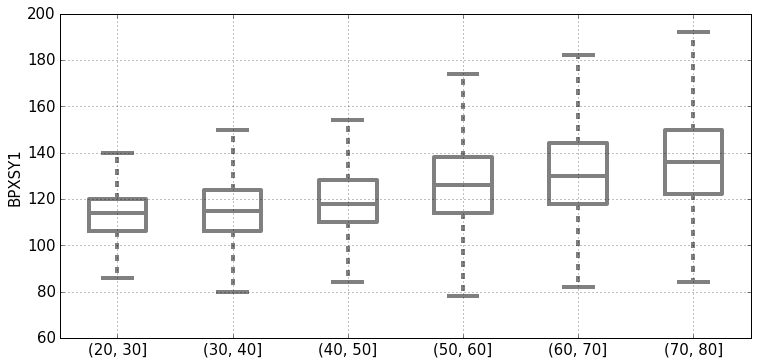

In [17]:
d = df.boxplot(column=("BPXSY1"), by=("Agecut"), figsize=(12, 6), return_type='dict')
plt.suptitle("")
plt.title("")
plt.ylabel("BPXSY1", size=15)
plt.xlabel("")
ax = plt.gca()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

def fix_boxes(d):
    for k in d:
        for b in d[k]['boxes']:
            b.set_linewidth(4)
            b.set_color('grey')
        for m in d[k]['medians']:
            m.set_linewidth(4)
            m.set_color('grey')  
        for w in d[k]['whiskers']:
            w.set_linewidth(4)
            w.set_color('grey')
        for w in d[k]['caps']:
            w.set_linewidth(4)
            w.set_color('grey')        
        for w in d[k]['fliers']:
            w.set_visible(False)

fix_boxes(d)
plt.ylim(60, 200)

We can further improve the plot by including the sample sizes in the labels.  There are various ways to do this.  The approach we use here is to create a new variable in the dataframe whose values are the labels as we would like them to appear in the plot (with the sample size included).

In [18]:
ct = df["Agecut"].value_counts()
ct = ct.sort_index()
lab = ["%s\nn=%d" % (k, n) for k,n in zip(ct.index, ct.values)] 

Now we can make the boxplot as above.

(60, 200)

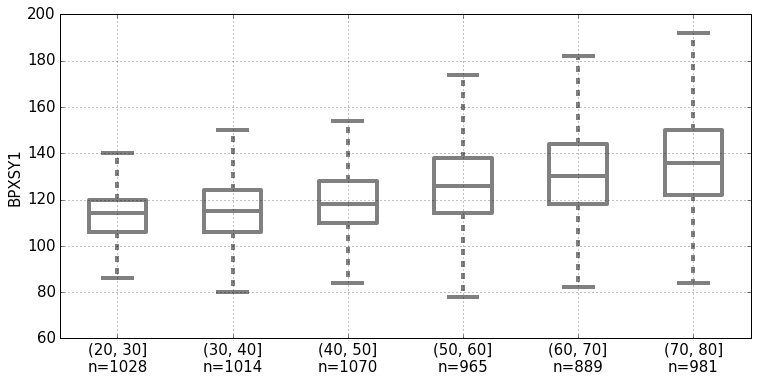

In [19]:
d = df.boxplot(column=("BPXSY1"), by=("Agecut"), figsize=(12, 6), return_type='dict')
plt.suptitle("")
plt.title("")
plt.ylabel("BPXSY1", size=15)
plt.xlabel("")
ax = plt.gca()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticklabels(lab)

fix_boxes(d)
plt.ylim(60, 200)

Seaborn
--------

Seaborn is a somewhat higher-level plotting interface compared to the approaches demonstrated above.  It also has a different approach to aesthetics that some people may prefer.

In [20]:
import seaborn as sns

First we will use Seaborn to plot a histogram, with a continuous estimate of the density function superimposed on the histogram.

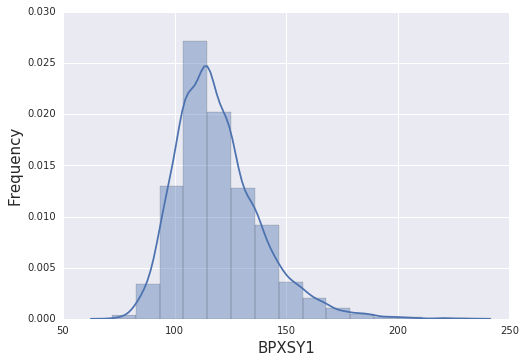

In [21]:
sns.distplot(df.BPXSY1.dropna(), bins=15)
plt.xlabel("BPXSY1", size=15)
plt.ylabel("Frequency", size=15)

Next we will make a scatterplot.  Seaborn automatically adds histograms of the marginal distributions to the scatterplot.

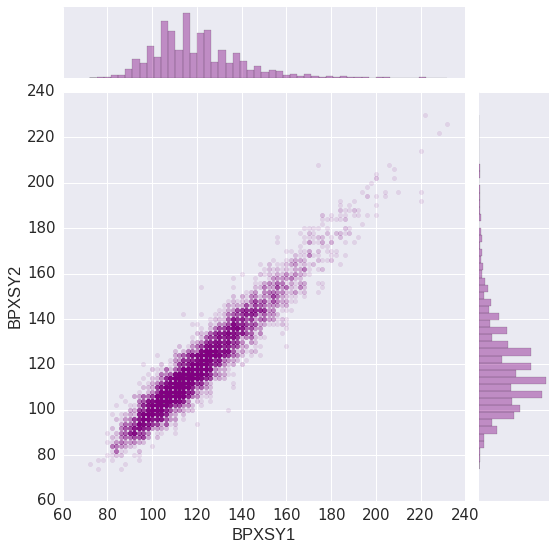

In [22]:
sns.set_context("notebook", font_scale=1.5)
df1 = df[["BPXSY1", "BPXSY2"]].dropna()
sns.jointplot(x=df1.BPXSY1, y=df1.BPXSY2, stat_func=None, size=8, alpha=0.1, color='purple')

For large datasets, it may be more informative to plot an estimate of the joint density function rather than making a scatterplot.

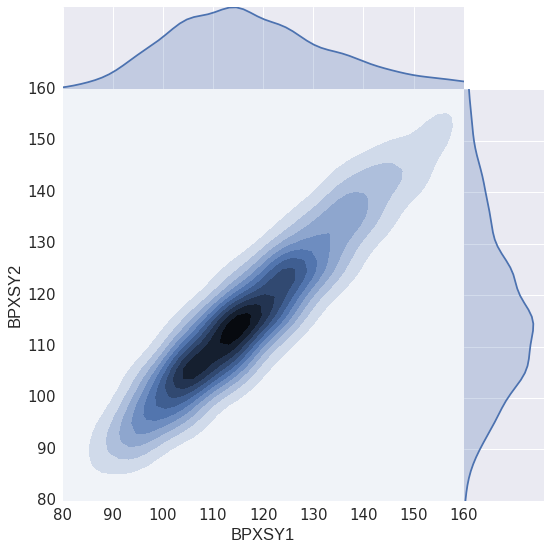

In [23]:
df1 = df[["BPXSY1", "BPXSY2"]].dropna()
sns.jointplot(x=df1.BPXSY1, y=df1.BPXSY2, kind='kde', stat_func=None, space=0, xlim=(80, 160), ylim=(80, 160), size=8)

We can superimpose multiple scatterplots and add a fitted mean line by using Seaborn's `lmplot` with the `hue` option.

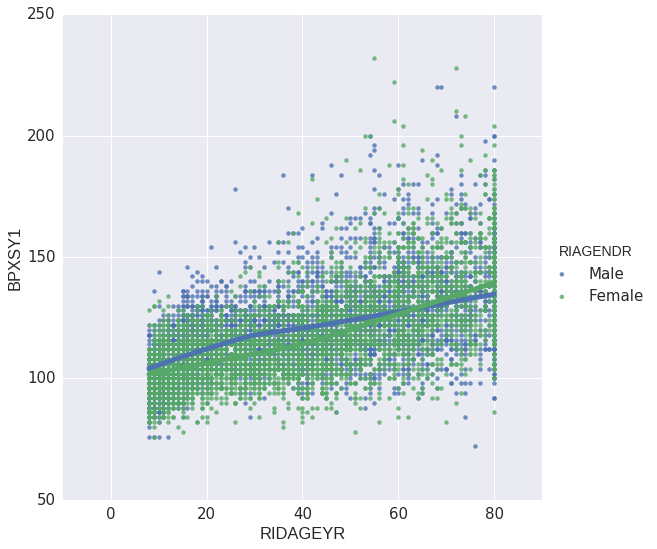

In [24]:
sns.lmplot(x="RIDAGEYR", y="BPXSY1", lowess=True, hue="RIAGENDR", line_kws={"lw": 5}, data=df, size=8)

The `FacetGrid` is a convenient way to make an array of plots.  This can be used, for example, to stratify on certain variables while exploring the relationships among other variables.  Next we use `FacetGrid` to look at the relationship between age and blood pressure within gender/ethnicity subgroups.

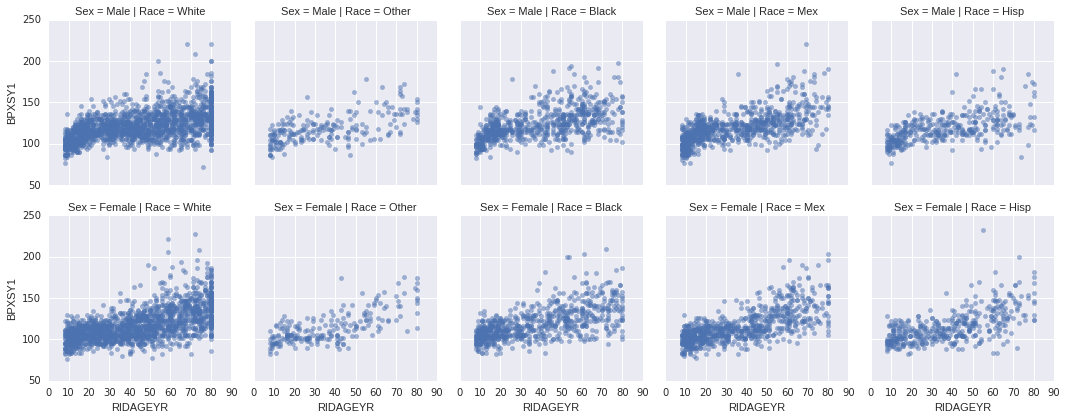

In [25]:
sns.set_context("notebook", font_scale=1)
df1 = df.rename(columns={"RIAGENDR": "Sex", "RIDRETH1": "Race"})
df1["Race"] = df1["Race"].replace({1: "Mex", 2: "Hisp", 3: "White", 4: "Black", 5: "Other"})
g = sns.FacetGrid(df1, col="Race", row="Sex")
g.map(plt.scatter, "RIDAGEYR", "BPXSY1", alpha=0.5)

We can map most plotting functions over the FacetGrid.  Here is an example using `regplot`.

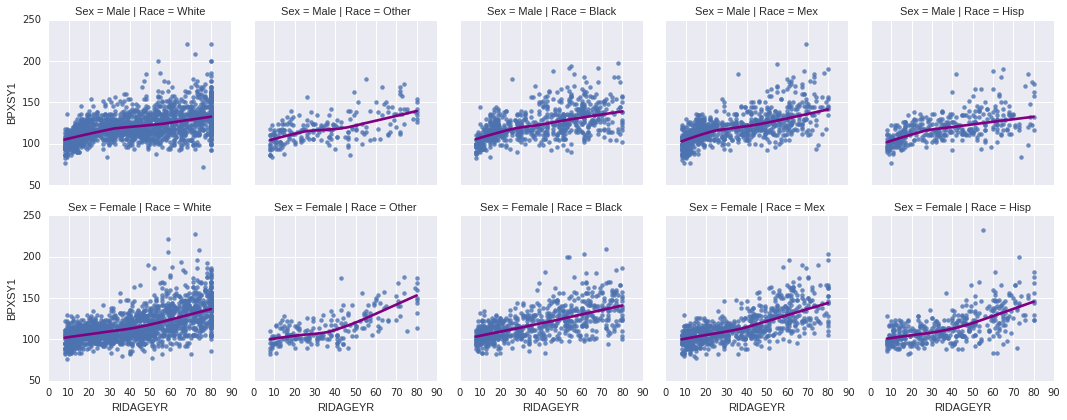

In [26]:
g = sns.FacetGrid(df1, col="Race", row="Sex")
g.map(sns.regplot, "RIDAGEYR", "BPXSY1", lowess=True, line_kws={"color": "purple"})

mpld3
------

mpld3 is a library that allows you to make interactive plots.  There are many forms of interactivity, such as allowing the user to click on a point and view some identifying information about that point.

In [27]:
import mpld3
from mpld3 import plugins

The next cell produces a scatterplot of systolic blood pressure versus age.  You can hover over each point to see the subject identifier (`SEQN`) corresponding to the point.  For performance reasons, and to reduce overplotting, we show only 1000 points.

In [28]:
df1 = df.sample(n=1000)
df1 = df1[["RIDAGEYR", "BPXSY1", "SEQN"]].dropna()

fig, ax = plt.subplots()
points = ax.scatter(df1.RIDAGEYR, df1.BPXSY1, s=30, alpha=0.7)
labels = ["%.0f" % x for x in df1.SEQN]

tooltip = plugins.PointLabelTooltip(points, labels)
plugins.connect(fig, tooltip)
mpld3.display()

In [29]:
df1 = df.sample(n=1000)
df1 = df1[["RIDAGEYR", "BPXSY1", "BMXBMI"]].dropna()
fig, ax = plt.subplots(1, 2)
fig.set_size_inches((12, 4))
ax[0].scatter(df1.RIDAGEYR, df1.BPXSY1)
ax[0].set_xlabel("Age", size=15)
ax[0].set_ylabel("SBP", size=15)
points = ax[1].scatter(df1.RIDAGEYR, df1.BMXBMI)
ax[1].set_xlabel("Age", size=15)
ax[1].set_ylabel("BMI", size=15)
plugins.connect(fig, plugins.LinkedBrush(points))
mpld3.display()